In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

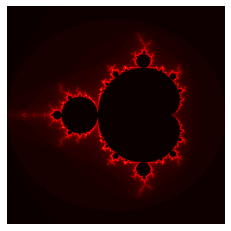

In [2]:
# Define the size of the image
width = 1000
height = 1000

# Define the region of the complex plane to plot
xmin, xmax = -2, 1
ymin, ymax = -1.5, 1.5

# Create a 2D array to store the number of iterations
# required to escape the Mandelbrot set
max_iter = 100
escape = np.zeros((height, width), dtype=int)

# Loop over all pixels in the image
for j in range(height):
    y = ymin + (ymax - ymin) * j / height
    for i in range(width):
        x = xmin + (xmax - xmin) * i / width
        c = x + y * 1j
        z = c
        for n in range(max_iter):
            if abs(z) > 2:
                escape[j, i] = n
                break
            z = z**2 + c

# Plot the Mandelbrot set
plt.imshow(escape, cmap='hot', extent=[xmin, xmax, ymin, ymax])
plt.axis('off')
plt.show()


CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '432x288', '-pix_fmt', 'rgba', '-r', '10', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-y', 'mandelbrot.mp4']' returned non-zero exit status 255.

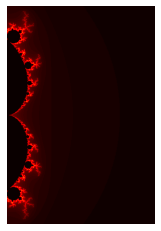

In [3]:
# Define the size of the image
width = 1000
height = 1000

# Define the number of frames and the frame rate
num_frames = 60
fps = 10

# Define the sequence of values for xmin, xmax, ymin, and ymax
xmin_seq = np.linspace(-2, 1, num_frames)
xmax_seq = np.linspace(-1, 2, num_frames)
ymin_seq = np.linspace(-1.5, 1.5, num_frames)
ymax_seq = np.linspace(1.5, -1.5, num_frames)

# Create the figure and axis
fig, ax = plt.subplots()

# Create a function to update the plot for each frame
def update(i):
    xmin = xmin_seq[i]
    xmax = xmax_seq[i]
    ymin = ymin_seq[i]
    ymax = ymax_seq[i]

    # Create a 2D array to store the number of iterations
    # required to escape the Mandelbrot set
    max_iter = 100
    escape = np.zeros((height, width), dtype=int)

    # Loop over all pixels in the image
    for j in range(height):
        y = ymin + (ymax - ymin) * j / height
        for i in range(width):
            x = xmin + (xmax - xmin) * i / width
            c = x + y * 1j
            z = c
            for n in range(max_iter):
                if abs(z) > 2:
                    escape[j, i] = n
                    break
                z = z**2 + c

    # Update the plot
    ax.clear()
    ax.imshow(escape, cmap='hot', extent=[xmin, xmax, ymin, ymax])
    ax.axis('off')

    return ax

# Create the animation
anim = animation.FuncAnimation(fig, update, frames=num_frames, interval=1000/fps)

# Save the animation as a video file
Writer = animation.writers['ffmpeg']
writer = Writer(fps=fps)
anim.save('mandelbrot.mp4', writer=writer)
